In [1]:
import pandas as pd
from src.my_functions import * 
import numpy as np
import json

import seaborn as sns
import re

pd.set_option('display.max_columns', None)

# UPLOAD DATA  .json + DF  🎯

## DF's

In [492]:
# 🔑🔑🔑

df2 = pd.read_csv('./DATA/data.CSV/df_Spain_good.csv')
df_full_location = pd.read_csv('df_full_location_concat.csv')
df = pd.read_csv('df_tripAD_Spain.csv')   # ABRIR este  (DATASET LIMPIO)

## CONTADOR KW-DF

In [172]:
#1 -> df_kw_meals
with open('./DATA/data.JSON/dict_kw_meals_count.json', 'r') as kw:
    kw_meals_count = json.load(kw)  #ABRIR (en otra celda)
    
kw_meals_count_sorted = kw_sorted(kw_meals_count)   
df_kw_meals = pd.DataFrame(  [[key, kw_meals_count_sorted[key]]    for key in kw_meals_count_sorted.keys()],
                          columns=['keyword', 'total_kw' ])

#2 -> df_kw_TOP_TAGS
with open('./DATA/data.JSON/lis_kw.json', 'r') as kw:
    lis_kw = json.load(kw)  #ABRIR
    
kw_top_tags_count = lis_kw   #renombramos el dict.json
kw_top_tags_count_sorted = kw_sorted(kw_top_tags_count)  
df_kw_top_tags = pd.DataFrame( [[key, kw_top_tags_count_sorted[key]]    for key in kw_top_tags_count_sorted.keys()],
                          columns=['keyword', 'total_kw' ])
#3 -> df_kw_CUISINES
with open('./DATA/data.JSON/dict_kw_cuisines_count.json', 'r') as kw:
    kw_cuisines_count = json.load(kw)  #ABRIR (en otra celda)
    
kw_cuisines_count_sorted = kw_sorted(kw_cuisines_count)
df_kw_cuisines = pd.DataFrame( [[key, kw_cuisines_count_sorted[key]]    for key in kw_cuisines_count_sorted.keys()],
                          columns=['keyword', 'total_kw' ])

#4 df_kw_FEATURES
with open('./DATA/data.JSON/dict_kw_features_count.json', 'r') as kw:
    kw_features_count = json.load(kw)                #ABRIR (en otra celda)
    
kw_features_count_sorted = kw_sorted(kw_features_count)

df_kw_features = pd.DataFrame( [[key, kw_features_count_sorted[key]]    for key in kw_features_count_sorted.keys()],
                          columns=['keyword', 'total_kw' ])

# ANÁLISIS TOP_TAGS  ✨✨

In [94]:
df_kw_top_tags.loc[:4]   #  CONTADOR KW

keyword  total_kw
0      Mid-range     79424
1        Spanish     76857
2  Mediterranean     53632
3     Cheap Eats     33494
4       European     20693

In [ ]:
df_kw_top_tags[(df_kw_top_tags.total_kw == 4)]

In [ ]:
df_kw_top_tags.keyword = df_kw_top_tags.keyword.apply(lambda x: x.lower().replace(' ', '_'))   #OPCIÓN  1

In [174]:
df_kw_top_tags.columns = [col.lower().replace(' ', '_') for col in df_kw_top_tags.columns]     #OPCIÓN  2 para la transpuesta

In [175]:
df_kw_top_tags.set_index('keyword', inplace=True)   #REINDEXxX
df_kw_top_tags=df_kw_top_tags.T    #TRANSPUESTA

In [176]:
df_kw_top_tags   #CONTADOR de KEYWORDS

keyword   Mid-range  Spanish  Mediterranean  Cheap Eats  European    Bar  \
total_kw      79424    76857          53632       33494     20693  17524   

keyword   Info no disponible  Vegetarian Friendly   Cafe  Italian  Pizza  \
total_kw               15633                14291  13308    10678   8736   

keyword    Pub  International  Seafood  Fast food  American  Steakhouse  \
total_kw  6635           6536     6385       5829      5476        5459   

keyword   Asian  Fine Dining  Barbecue  Dessert  Japanese  Chinese  Healthy  \
total_kw   4506         3913      3813     3287      3086     2708     2476   

keyword   Vegan Options  Sushi  Fusion  Mexican  Gluten Free Options  Grill  \
total_kw           2470   2437    1993     1902                 1863   1604   

keyword   Contemporary  British  Latin  Indian  Basque  Bakeries  \
total_kw          1452     1414   1365    1354    1351      1334   

keyword   South American  French  Diner  Argentinian  Catalan  Deli  Brew Pub  \
total_kw            1305    1249   1114          872      860   853       814   

keyword   Wine Bar  Quick Bites  Turkish  German  Gastropub  Thai  \
total_kw       761          699      630     577        548   544   

keyword   Middle Eastern  Street Food  Peruvian  Dining bars  Moroccan  \
total_kw             543          521       520          503       494   

keyword   Venezuelan  Caribbean  Brazilian  Irish  Balti  Belgian  Lebanese  \
total_kw         382        331        276    276    266      252       249   

keyword   Dutch  Greek  Central American  African  Cantonese  \
total_kw    185    181               171      168        163   

keyword   Central European  Hawaiian  Portuguese  Colombian  Soups  Arabic  \
total_kw               160       154         140        123    122     121   

keyword   Beer restaurants  Korean  Cuban  Eastern European  Japanese Fusion  \
total_kw               115     111    103                93               87   

keyword   Neapolitan  Pakistani  Vietnamese  Speciality Food Market  \
total_kw          83         83          81                      75   

keyword   Scandinavian  Russian  Hong Kong  Swiss  Nepalese  Philippine  \
total_kw            72       67         58     57        56          50   

keyword   Central Asian  Southern-Italian  Cajun & Creole  Austrian  \
total_kw             50                47              43        42   

keyword   Central-Italian  Afghani  Swedish  Shanghai  Szechuan  Romanian  \
total_kw               40       39       38        38        38        37   

keyword   Polish  Ecuadorean  Chilean  Northern-Italian  Indonesian  Albanian  \
total_kw      32          32       30                29          27        26   

keyword   Sicilian  Danish  Romana  Halal  Persian  Campania  Southwestern  \
total_kw        26      26      25     25       23        22            21   

keyword   Armenian  Fruit parlours  Tuscan  Medicinal foods  Australian  \
total_kw        21              18      18               17          17   

keyword   Slovenian  Bangladeshi  Dine With a Local Chef  Taiwanese  Hunan  \
total_kw         17           16                      15         14     14   

keyword   Georgian  Delivery Only  Israeli  Lazio  Jamaican  \
total_kw        13             13       12     11        11   

keyword   Japanese sweets parlour  Egyptian  Native American  Beijing cuisine  \
total_kw                       10        10                9                9   

keyword   Norwegian  Scottish  Ethiopian  Caucasian  Canadian  Czech  \
total_kw          9         8          8          8         7      7   

keyword   Bahamian  Salvadoran  Imperial Chinese  Sardinian  Hungarian  \
total_kw         7           6                 6          6          6   

keyword   Malaysian  Welsh  Apulian  Guatemalan  Tibetan  Puerto Rican  \
total_kw          5      5        5           5        4             4   

keyword   Mongolian  Polynesian  NorthWestern Chinese  Calabrian  Singaporean 

In [ ]:
# ¿?
fine_dining + fusion + contemporary + deli(or delicatessen, german word) + middle_eastern

**1. TYPES OF FOOD**
pizza + seafood + steakhouse(asador) + seafood + sushi + grill(parrilla) + soups 

In [ ]:
food =  ['pizza', 'seafood', 'steakhouse', 'seafood', 'sushi', 'grill', 'soups'] 

In [ ]:
if any(word in 'kasgfg' for word in food):
    print(1)
else:
    print(0)

**2. KW  SPANISH FOOD** 
spanish + mediterranean

**3. KW  CHEAT FOOD**  cheap_eats + quick_bites(Bocadillos)

**4. KW BAR**  (brew pub=pub de cerveza)
bar + pub + brew_pub + wine_bar + gastropub + dining_bars + beer_restaurants  

**5. KW HEALTHY FOOD**
vegetarian_friendly + healthy + vegan_options + vegetarian_friendly + gluten_free_options  

**6. CÁFE**
cafe + dessert + bakeries

**7. INTERNACIONAL (Continentes)**


**EUROPIAN** (balti, comida Birmingham Inglaterra (curry picante))
european + italian + british + french + german + turkish + irish + balti + belgian + dutch + greek + portuguese   

**AMÉRICA SUR**
mexican + latin + south_american + argentinian + peruvian + venezuelan + caribbean + brazilian + central_american + cuban + ecuadorean + chilean  

**AMÉRICA NORTE** american + hawaiian

**ÁFRICA** african + moroccan

**ASIA**
asian + japanese + chinese + indian + thai + lebanese + russian + vietnamese +

In [90]:
df2.top_tags.value_counts().head()

Info no disponible                             14939
Mid-range, Spanish                              9360
Spanish                                         7290
Mid-range, Mediterranean, Spanish               6833
Mid-range, Mediterranean, European, Spanish     6632
Name: top_tags, dtype: int64

In [ ]:
             #'Info no disponible'
df2.shape[0] - 14939  #Tengo 140175 FILAS con tags,  {el resto es 'Info no disponible' (10% del DF) ~ MAYBE DELETE }

In [ ]:
df2[df2.top_tags.str.contains('Dutch', regex=True)].head(2)  # Mediterranean, American, German, DUCTCH, Europe...

## DF TOP TAGS

In [144]:
# OPENN 🔑🔑🔑
df = pd.read_csv('df_tripAD_Spain.csv')
df = df.reset_index()

In [475]:
df = df.drop(df[df.top_tags == 'Info no disponible'].index)

In [149]:
df.shape   #df_limpitooo (de full_location)

(135719, 32)

In [150]:
df.region_.unique()   # Señal de que el DF esta limpio

array(['Andalucía', 'Catalunya', 'Canarias', 'Illes Balears', 'Euskadi',
       'Comunidad Valenciana', 'Castilla y León', 'Galicia',
       'Castilla-La Mancha', 'Aragón', 'Asturias', 'Comunidad de Madrid',
       'Navarra', 'Región de Murcia', 'Cantabria', 'La Rioja',
       'Extremadura', 'Ceuta', 'Melilla'], dtype=object)

In [194]:
df.columns

Index(['index', 'restaurant_link', 'restaurant_name', 'country', 'region',
       'province', 'city', 'address', 'latitude', 'longitude', 'claimed',
       'top_tags', 'price_range', 'meals', 'cuisines', 'special_diets',
       'features', 'vegetarian_friendly', 'vegan_options', 'gluten_free',
       'original_open_hours', 'avg_rating', 'total_reviews_count',
       'default_language', 'food', 'service', 'value', 'lat_long',
       'full_location', 'province_', 'city_village', 'region_'],
      dtype='object')

In [168]:
df_top_tags = df[['restaurant_link', 'restaurant_name', 'region_', 'province_', 'city_village', 'latitude', 'longitude', 'lat_long',
                  'address', 'top_tags', 'avg_rating']].copy()
df_top_tags.head(3)

restaurant_link       restaurant_name    region_ province_  \
0  g10021880-d13763192  Taberna La Sacristia  Andalucía   Sevilla   
1  g10021880-d15758746     Tasca el Capricho  Andalucía   Sevilla   
2  g10021880-d19332558       Bar Las Adelfas  Andalucía   Sevilla   

  city_village  latitude  longitude                  lat_long  \
0  Aznalcóllar  37.51928   -6.26885  ('37.51928', '-6.26885')   
1  Aznalcóllar  37.52065   -6.26822  ('37.52065', '-6.26822')   
2  Aznalcóllar  37.52428   -6.27144  ('37.52428', '-6.27144')   

                                             address  \
0      Calle del Concejo 19, 41870 Aznalcollar Spain   
1  Calle del 28 de Febrero 9, 41870 Aznalcollar S...   
2  Calle Perdon N° 23 Capilla de La Cruz, 41870 A...   

                               top_tags avg_rating  
0                               Spanish        3.0  
1                               Spanish        5.0  
2  Mediterranean, Spanish, Grill, Diner        3.0

In [169]:
df_top_tags.shape, df.shape

((135719, 11), (135719, 32))

In [178]:
food =  ['pizza', 'seafood', 'steakhouse', 'sushi', 'grill', 'soups']
spanish_food = ['spanish', 'mediterranean']
cheap_eats = [ 'quick_bites', 'street_food']
beer_wine =  ['brew pub', 'bar', 'pub', 'wine_bar', 'gastropub', ' dining_bars', 'beer_restaurants']
healthy_food = ['vegetarian_friendly', 'healthy', 'vegan_options', 'vegetarian_friendly', 'gluten_free_options']
cafe_dessert = ['cafe', 'dessert', 'bakeries']
cost_food = ['cheap_eats', 'mid_range']

european = ['european', 'italian', 'italian', 'british', 'french', 'turkish', 'irish', 'balti', 'belgian', 'dutch', 'greek ',
           'portuguese']
central_american = ['central_american', 'caribbean']
south_american = ['south_american', 'mexican', 'argentinian', 'peruvian', 'venezuelan', 'brazilian', 'cuban', 'ecuadorean', 
                 'chilean']
north_american = ['america', 'hawaiian']
african = ['african', 'moroccan']
asia = ['asian', 'japanese', 'chinese', 'indian', 'thai', 'lebanese', 'russian', 'vietnamese']

In [155]:
#   KW  FOOD  - 28 COLUMNAS NUEVAS
len(food), len(spanish_food), len(cheap_eats), len(beer_wine), len(healthy_food), len(cafe_dessert), len(cost_food)

(6, 2, 2, 7, 5, 3, 2)

In [156]:
#   INTERNACIONAL FOOD
len(european), len(central_american), len(south_american), len(north_american), len(african)

(12, 2, 9, 2, 2)

## CREATE Dataframe [ 0 ,1 ]

In [205]:
df_top_tags.top_tags.str.contains('Street Food').sum()

502

In [177]:
df_kw_top_tags.head(4)  #CONTADOR de KW

keyword   Mid-range  Spanish  Mediterranean  Cheap Eats  European    Bar  \
total_kw      79424    76857          53632       33494     20693  17524   

keyword   Info no disponible  Vegetarian Friendly   Cafe  Italian  Pizza  \
total_kw               15633                14291  13308    10678   8736   

keyword    Pub  International  Seafood  Fast food  American  Steakhouse  \
total_kw  6635           6536     6385       5829      5476        5459   

keyword   Asian  Fine Dining  Barbecue  Dessert  Japanese  Chinese  Healthy  \
total_kw   4506         3913      3813     3287      3086     2708     2476   

keyword   Vegan Options  Sushi  Fusion  Mexican  Gluten Free Options  Grill  \
total_kw           2470   2437    1993     1902                 1863   1604   

keyword   Contemporary  British  Latin  Indian  Basque  Bakeries  \
total_kw          1452     1414   1365    1354    1351      1334   

keyword   South American  French  Diner  Argentinian  Catalan  Deli  Brew Pub  \
total_kw            1305    1249   1114          872      860   853       814   

keyword   Wine Bar  Quick Bites  Turkish  German  Gastropub  Thai  \
total_kw       761          699      630     577        548   544   

keyword   Middle Eastern  Street Food  Peruvian  Dining bars  Moroccan  \
total_kw             543          521       520          503       494   

keyword   Venezuelan  Caribbean  Brazilian  Irish  Balti  Belgian  Lebanese  \
total_kw         382        331        276    276    266      252       249   

keyword   Dutch  Greek  Central American  African  Cantonese  \
total_kw    185    181               171      168        163   

keyword   Central European  Hawaiian  Portuguese  Colombian  Soups  Arabic  \
total_kw               160       154         140        123    122     121   

keyword   Beer restaurants  Korean  Cuban  Eastern European  Japanese Fusion  \
total_kw               115     111    103                93               87   

keyword   Neapolitan  Pakistani  Vietnamese  Speciality Food Market  \
total_kw          83         83          81                      75   

keyword   Scandinavian  Russian  Hong Kong  Swiss  Nepalese  Philippine  \
total_kw            72       67         58     57        56          50   

keyword   Central Asian  Southern-Italian  Cajun & Creole  Austrian  \
total_kw             50                47              43        42   

keyword   Central-Italian  Afghani  Swedish  Shanghai  Szechuan  Romanian  \
total_kw               40       39       38        38        38        37   

keyword   Polish  Ecuadorean  Chilean  Northern-Italian  Indonesian  Albanian  \
total_kw      32          32       30                29          27        26   

keyword   Sicilian  Danish  Romana  Halal  Persian  Campania  Southwestern  \
total_kw        26      26      25     25       23        22            21   

keyword   Armenian  Fruit parlours  Tuscan  Medicinal foods  Australian  \
total_kw        21              18      18               17          17   

keyword   Slovenian  Bangladeshi  Dine With a Local Chef  Taiwanese  Hunan  \
total_kw         17           16                      15         14     14   

keyword   Georgian  Delivery Only  Israeli  Lazio  Jamaican  \
total_kw        13             13       12     11        11   

keyword   Japanese sweets parlour  Egyptian  Native American  Beijing cuisine  \
total_kw                       10        10                9                9   

keyword   Norwegian  Scottish  Ethiopian  Caucasian  Canadian  Czech  \
total_kw          9         8          8          8         7      7   

keyword   Bahamian  Salvadoran  Imperial Chinese  Sardinian  Hungarian  \
total_kw         7           6                 6          6          6   

keyword   Malaysian  Welsh  Apulian  Guatemalan  Tibetan  Puerto Rican  \
total_kw          5      5        5           5        4             4   

keyword   Mongolian  Polynesian  NorthWestern Chinese  Calabrian  Singaporean 

###  Keywords TYPES OF FOOD - [ 0, 1 ]

In [213]:
df_top_tags['vegetarian_friendly']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Vegetarian Friendly', regex=False)]
df_top_tags['vegan_options']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Vegan Options', regex=False)]
df_top_tags['gluten_free_options']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Gluten Free Options', regex=False)]


df_top_tags['pizza']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Pizza', regex=False)]
df_top_tags['seafood']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Seafood', regex=False)]
df_top_tags['steakhouse']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Steakhouse', regex=False)]
df_top_tags['sushi']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Sushi', regex=False)]
df_top_tags['grill']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Grill', regex=False)]
df_top_tags['soups']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Soups', regex=False)]

df_top_tags['quick_bites']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Quick Bites', regex=False)]
df_top_tags['street_food']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Street Food', regex=False)]

df_top_tags['brew pub']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Brew Pub', regex=False)]
df_top_tags['bar']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Bar', regex=False)]
df_top_tags['pub']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Pub', regex=False)]
df_top_tags['wine_bar']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Wine Bar', regex=False)]
df_top_tags['gastropub']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Gastropub', regex=False)]
df_top_tags['beer_restaurants']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Beer restaurants', regex=False)]

df_top_tags['spanish']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Spanish', regex=False)]
df_top_tags['mediterranean']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Mediterranean', regex=False)]

df_top_tags['cafe']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Cafe', regex=False)]
df_top_tags['dessert']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Dessert', regex=False)]
df_top_tags['bakeries']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Bakeries', regex=False)]

df_top_tags['mid_range']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Mid-range', regex=False)]
df_top_tags['cheap_eats']= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains('Cheap Eats', regex=False)]

In [ ]:
df_top_tags.head(3)

In [219]:
# RENAME DF   df_TYPES_OF_FOOD
df_types_of_food = df_top_tags.copy()

In [220]:
df_types_of_food.shape

(135719, 35)

In [221]:
# 🔐🔐🔐
df_types_of_food.to_csv('df_types_of_food.csv', header=True, index=False)

In [223]:
df_types_of_food.gluten_free_options.sum()

1756

### Keywords INTERNATIONAL FOOD 

In [188]:
df_international_food = df[['restaurant_link', 'restaurant_name', 'region_', 'province_', 'city_village', 'latitude', 'longitude', 
                            'lat_long', 'address', 'top_tags', 'avg_rating']].copy()
df_international_food.head(3)

restaurant_link       restaurant_name    region_ province_  \
0  g10021880-d13763192  Taberna La Sacristia  Andalucía   Sevilla   
1  g10021880-d15758746     Tasca el Capricho  Andalucía   Sevilla   
2  g10021880-d19332558       Bar Las Adelfas  Andalucía   Sevilla   

  city_village  latitude  longitude                  lat_long  \
0  Aznalcóllar  37.51928   -6.26885  ('37.51928', '-6.26885')   
1  Aznalcóllar  37.52065   -6.26822  ('37.52065', '-6.26822')   
2  Aznalcóllar  37.52428   -6.27144  ('37.52428', '-6.27144')   

                                             address  \
0      Calle del Concejo 19, 41870 Aznalcollar Spain   
1  Calle del 28 de Febrero 9, 41870 Aznalcollar S...   
2  Calle Perdon N° 23 Capilla de La Cruz, 41870 A...   

                               top_tags avg_rating  
0                               Spanish        3.0  
1                               Spanish        5.0  
2  Mediterranean, Spanish, Grill, Diner        3.0

In [189]:
df_international_food.shape

(135719, 11)

In [190]:
df_international_food['european']= [1 if x is True else 0  for x in df_international_food.top_tags.str.contains('European', regex=False)]
df_international_food['central_american']= [1 if x is True else 0  for x in df_international_food.top_tags.str.contains('Central American', regex=False)]
df_international_food['south_american']= [1 if x is True else 0  for x in df_international_food.top_tags.str.contains('South American', regex=False)]
df_international_food['america']= [1 if x is True else 0  for x in df_international_food.top_tags.str.contains('America', regex=False)]
df_international_food['african']= [1 if x is True else 0  for x in df_international_food.top_tags.str.contains('African', regex=False)]
df_international_food['asian']= [1 if x is True else 0  for x in df_international_food.top_tags.str.contains('Asian', regex=False)]

In [191]:
df_international_food.head(3)

restaurant_link       restaurant_name    region_ province_  \
0  g10021880-d13763192  Taberna La Sacristia  Andalucía   Sevilla   
1  g10021880-d15758746     Tasca el Capricho  Andalucía   Sevilla   
2  g10021880-d19332558       Bar Las Adelfas  Andalucía   Sevilla   

  city_village  latitude  longitude                  lat_long  \
0  Aznalcóllar  37.51928   -6.26885  ('37.51928', '-6.26885')   
1  Aznalcóllar  37.52065   -6.26822  ('37.52065', '-6.26822')   
2  Aznalcóllar  37.52428   -6.27144  ('37.52428', '-6.27144')   

                                             address  \
0      Calle del Concejo 19, 41870 Aznalcollar Spain   
1  Calle del 28 de Febrero 9, 41870 Aznalcollar S...   
2  Calle Perdon N° 23 Capilla de La Cruz, 41870 A...   

                               top_tags avg_rating  european  \
0                               Spanish        3.0         0   
1                               Spanish        5.0         0   
2  Mediterranean, Spanish, Grill, Diner        3.0         0   

   central_american  south_american  america  african  asian  
0                 0               0        0        0      0  
1                 0               0        0        0      0  
2                 0               0        0        0      0

In [192]:
df_international_food.shape

(135719, 17)

In [193]:
# 🔐🔐🔐
df_international_food.to_csv('df_international_food.csv', header=True, index=False)

## FAILS CODE

#### TEST - SETTING COL's  ->  KEYWORDS

In [ ]:
df = df_top_tags.sample(10).copy()
df

In [ ]:
cafe_dessert

In [ ]:
df['cafe']= [1 if x is True else 0  for x in df.top_tags.str.contains('Cafe', regex=False)]
df['dessert']= [1 if x is True else 0  for x in df.top_tags.str.contains('Dessert', regex=False)]
df['bakeries']= [1 if x is True else 0  for x in df.top_tags.str.contains('Bakeries', regex=False)]

In [ ]:
# SET COLUMNA 
columns_kw = pd.MultiIndex.from_product([['types_of_food'], cafe_dessert])
                                                        # , ['pizza', 'seafood', 'steakhouse', 'seafood', 'sushi', 'grill', 'soups']

In [ ]:
df_test = pd.Series(data=df['cafe', 'dessert', 'bakeries'], columns=columns_kw )

**CHECKING si a transformación es correcta**

In [ ]:
food =  ['Pizza', 'Seafood', 'Steakhouse', 'Seafood', 'Sushi', 'Grill', 'Soups'] 

In [ ]:
def cero_uno_col(list_kw):
    for kw in list_kw:
        for index, row in df_top_tags.iterrows():
            df_top_tags[kw]= [1 if x is True else 0  for x in df_top_tags.top_tags.str.contains(kw, regex=False)]
        return df_top_tags
           

In [ ]:
df_top_tags.Pizza.value_counts()

In [ ]:
len(df_top_tags[df_top_tags.types_of_food == 0])+len(df_top_tags[df_top_tags.types_of_food == 1])

In [ ]:
df_top_tags.shape

In [ ]:
df_top_tags.pizza.value_counts(dropna=False)

#### FAIL New Column 'types_of_food'  (NO MIRAR)

In [ ]:
if any(word in 'kasgfg' for word in food):
    print(1)
else:
    print(0)

In [ ]:
food =  ['Pizza', 'Seafood', 'Steakhouse', 'Seafood', 'Sushi', 'Grill', 'Soups'] 
def col_list(nombre_col):
    for i,row in df_top_tags.iterrows():
        col = []
        if any(word in row['top_tags'] for word in f"{nombre_col}"):
            col.append(1)
        else:
            col.append(0)
    return col[-1]
        

In [ ]:
df_top_tags["types_of_food"] = col_list(food)

In [ ]:
df_top_tags[df_top_tags.types_of_food == 0]

# ANÁLISIS MEALS 🍴

## CREATE Dataframe [ 0, 1 ]

In [ ]:
df_kw_meals

**New Column 'types_of_food'**

In [ ]:
df_meals = df2[['restaurant_link','restaurant_name', 'region', 'latitude', 'longitude', 'meals']].copy()
df_meals.head(3)

In [ ]:
#df_kw_meals.columns = [col.lower().replace(' ', '_') for col in df_kw_meals.columns] #OPCIÓN  2 para la transpuesta
#df_kw_top_tags.set_index('keyword', inplace=True)   #REINDEXxX    NO hace Falta
#df_kw_top_tags=df_kw_top_tags.T                     #TRANSPUESTA  NO hace Falta 
#df_kw_top_tags

df_meals['dinner']= [1 if x is True else 0  for x in df_meals.meals.str.contains('Dinner', regex=False)]
df_meals['drinks']= [1 if x is True else 0  for x in df_meals.meals.str.contains('Drinks', regex=False)]
df_meals['lunch']= [1 if x is True else 0  for x in df_meals.meals.str.contains('Lunch', regex=False)]
df_meals['breakfast']= [1 if x is True else 0  for x in df_meals.meals.str.contains('Breakfast', regex=False)]
df_meals['brunch']= [1 if x is True else 0  for x in df_meals.meals.str.contains('Brunch', regex=False)]

In [ ]:
df_meals.head(7)

**CHECKING**

In [ ]:
df_meals.dinner.value_counts(dropna=False)

In [ ]:
len(df2[df2.meals.str.contains('Dinner')])

In [ ]:
meals = df_meals[['dinner', 'drinks', 'lunch', 'breakfast', 'brunch']]

**🧐**

<AxesSubplot:xlabel='european', ylabel='count'>

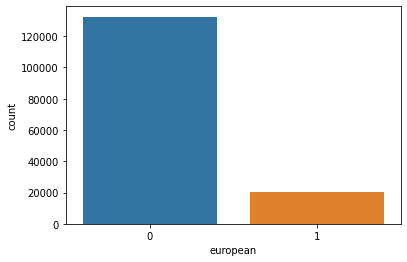

In [120]:
sns.countplot(x=df_international_food.european)

In [ ]:
df_international_food.columns

In [248]:
df_types_of_food.columns

Index(['restaurant_link', 'restaurant_name', 'region', 'latitude', 'longitude',
       'top_tags', 'pizza', 'seafood', 'steakhouse', 'sushi', 'grill', 'soups',
       'quick_bites', 'street_food', 'brew pub', 'bar', 'pub', 'wine_bar',
       'gastropub', 'beer_restaurants', 'spanish', 'mediterranean', 'cafe',
       'dessert', 'bakeries', 'mid_range'],
      dtype='object')

In [250]:
bar = df_types_of_food.groupby(['region']).bar.sum()

In [258]:
bar

region
Andalucia              3422
Aragon                  401
Asturias                297
Balearic Islands       1250
Basque Country          731
Canary Islands         1555
Cantabria               228
Castile and Leon        722
Castile-La Mancha       366
Catalonia              2989
Ceuta                     9
Community of Madrid    1519
Extremadura             212
Galicia                 827
La Rioja                118
Melilla                  29
Navarra                 132
Region of Murcia        362
Valencian Country      1840
Name: bar, dtype: int64

In [129]:
len((df_international_food[(df_international_food.south_american == 1)]))

1261

food | spanish_food | cheap_eats | beer_wine | healthy_food | cafe_dessert | cost_food

# DF LOCATION

In [180]:
#   OPEN   🔑🔑🔑
df_location = pd.read_csv('df_full_location_concat.csv')

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent= 'geoapiExercises')
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
reverse = RateLimiter(geolocator.reverse)

In [ ]:
df_location['lat_long'] = ''
def lat_long():    
    lat = df_location.latitude.astype(str)
    long = df_location.longitude.astype(str)
    mask = tuple(zip(lat,long))
    return mask 
df_location['lat_long'] = df_location.loc[:,['lat_long']].apply(lambda x: lat_long())
df_location['full_location'] = ''

In [ ]:
df['full_location'] = list(map(lambda regi: geolocator.reverse(regi).raw['address'], df['lat_long']))
df['province_'] = [val['country'] for val in df.full_location]
df['province_'] = [val['country'] for val in df.full_location]

In [ ]:
df_location[['full_location']]

In [ ]:
df_location[['lat_long', 'full_location']].head(3)

In [135]:
df_location.full_location.iloc[1000]

'{\'road\': \'Avinguda de Múrcia\', \'town\': \'Catarroja\', \'region\': "l\'Horta Sud", \'county\': \'València / Valencia\', \'state\': \'Comunitat Valenciana\', \'postcode\': \'46470\', \'country\': \'España\', \'country_code\': \'es\'}'

## EVAL

In [52]:
df_location.shape

(137818, 31)

In [53]:
df_location.full_location = df_location.full_location.astype(str)                       #   STR()

In [54]:
len(df_location[(df_location.full_location == 'nan')])

0

In [223]:
df_location = df_location.drop(df_location[df_location.full_location == 'nan'].index)   # DROPPP

In [55]:
df_location.full_location = df_location.full_location.apply(eval)                       #  EVAL

In [225]:
df_location.full_location.iloc[1000]

{'road': 'Avinguda de Múrcia',
 'town': 'Catarroja',
 'region': "l'Horta Sud",
 'county': 'València / Valencia',
 'state': 'Comunitat Valenciana',
 'postcode': '46470',
 'country': 'España',
 'country_code': 'es'}

**REGION**

In [118]:
df_location.full_location.loc[15]

{'amenity': 'La Tienda de Paco',
 'road': 'Calle Ezequiel Sánchez',
 'quarter': 'La Tosca',
 'hamlet': 'Lomo de Los Santos',
 'village': 'Tejeda',
 'county': 'Las Palmas',
 'archipelago': 'Canarias',
 'postcode': '35360',
 'country': 'España',
 'country_code': 'es'}

In [113]:
# EJEMPLOOOOOO   REGION
state = []
for i in df_location['full_location']:
    try:
        state.append(i['state'])
    except:
        try:
            state.append(i['archipelago'])  #Además de 'state' también tenemos 'archipelago'
        except:
            state.append ('None')

In [59]:
state[:4]

['Andalucía', 'Andalucía', 'Andalucía', 'Andalucía']

In [114]:
df_location['region_'] = state

**PROVINCE**

In [226]:
province = []   # PROVINCE
for i in df_location['full_location']:
    try:
        province.append(i['county'])
    except:
        try:
            province.append(i['state'])
        except:
            province.append ('None')

In [227]:
df_location['province_'] = province

In [228]:
#                           PROVINCE_             vs                            PROVINCE
len(df_location[df_location['province_']=='None']), len(df_location[df_location['province'] == '0'])

(2271, 29246)

In [229]:
df_location[df_location['province_']=='None'].sample(3)

restaurant_link                 restaurant_name country    region  \
11941   g1064316-d10672554  Asador Restaurante Los Panchos   Spain  Asturias   
124809    g608997-d4437256                       El Verano   Spain  Asturias   
146794  g7361550-d13722427         Bar Restaurante Ricardo   Spain  Asturias   

                    province             city  \
11941   Laviana Municipality  Pola de Laviana   
124809                     0     Villaviciosa   
146794                     0     Cabanaquinta   

                                              address  latitude  longitude  \
11941                   Muñera, Pola de Laviana Spain  43.23598  -5.527410   
124809     Lugar Cabriton 3, 33318 Villaviciosa Spain  43.53340  -5.457637   
146794  Francisco Cabrera 9, 33686 Cabanaquinta Spain  43.16111  -5.624684   

          claimed                                           top_tags  \
11941   Unclaimed           Mid-range, Steakhouse, European, Spanish   
124809    Claimed  Mid-range, Spanish, Vegetarian Friendly, Glute...   
146794    Claimed                                 Mid-range, Spanish   

               price_range                     meals  \
11941   Info no disponible             Lunch, Dinner   
124809             €20-€40        Info no disponible   
146794              €8-€20  Dinner, Breakfast, Lunch   

                             cuisines  \
11941   European, Steakhouse, Spanish   
124809                        Spanish   
146794                        Spanish   

                                   special_diets  \
11941                         Info no disponible   
124809  Gluten Free Options, Vegetarian Friendly   
146794                        Info no disponible   

                                                 features vegetarian_friendly  \
11941   Reservations, Seating, Table Service, Takeout,...                   N   
124809                                 Info no disponible                   Y   
146794                                 Info no disponible                   N   

       vegan_options gluten_free  \
11941              N           N   
124809             N           Y   
146794             N           N   

                                      original_open_hours avg_rating  \
11941                                  Info no disponible        4.0   
124809  {"Mon": ["11:00-23:00"], "Tue": [], "Wed": ["1...        4.0   
146794  {"Mon": ["07:00-23:30"], "Tue": ["07:00-23:30"...        4.0   

       total_reviews_count default_language                food  \
11941                 41.0          English                 4.0   
124809               153.0          English                 4.0   
146794                21.0    All languages  Info no disponible   

                   service               value                   lat_long  \
11941                  4.0                 4.0   ('43.23598', '-5.52741')   
124809                 4.0                 4.0   ('43.5334', '-5.457637')   
146794  Info no disponible  Info no disponible  ('43.16111', '-5.624684')   

                                            full_location province_  
11941   {'amenity': 'Asador restaurante Los Panchos', ...      None  
124809  {'town': 'Villaviciosa', 'country': 'España', ...      None  
146794  {'road': 'Avenida Francisco Cabrera', 'hamlet'...      None

In [230]:
df_location.full_location.loc[80484]

{'house_number': '1',
 'road': 'Calle Cruz del Sur',
 'quarter': 'Estrella',
 'suburb': 'Retiro',
 'city': 'Madrid',
 'municipality': 'Área metropolitana de Madrid y Corredor del Henares',
 'state': 'Comunidad de Madrid',
 'postcode': '28007',
 'country': 'España',
 'country_code': 'es'}

In [231]:
a = df_location.province_.unique()

In [232]:
a

array(['Sevilla', 'Barcelona', 'Las Palmas', 'Girona', 'Illes Balears',
       'Euskadi', 'Lleida', 'Tarragona', 'Santa Cruz de Tenerife', 'None',
       'València / Valencia', 'Alacant / Alicante', 'Segovia', 'Granada',
       'Sierra de Cádiz', 'Bahía de Cádiz', 'Costa Noroeste', 'Galicia',
       'Toledo', 'Almería', 'Navarra - Nafarroa', 'Aragón',
       'Asturias / Asturies', 'Castelló / Castellón', 'Torrent', 'Soria',
       'Valladolid', 'León', 'Os Ancares', 'Burgos', 'Guadalajara',
       'Comunidad de Madrid', 'La Axarquía', 'Málaga-Costa del Sol',
       'Urola-Kosta', 'Región de Murcia', 'Salamanca', 'Albacete',
       'Cantabria', 'Valle del Guadalhorce', 'O Deza',
       'Tabeirós - Terra de Montes', 'La Rioja', 'Jaén', 'Zamora',
       'Costa del Sol Occidental', 'Campo de Gibraltar', 'Quiroga',
       'Debabarrena', 'O Sar', 'Terra de Lemos', 'A Barcala', 'Ordes',
       'Ortegal', 'A Coruña', 'A Mariña Central', 'Bergantiños', 'O Eume',
       'A Mariña Occidental', 'F

**CITY**

In [233]:
city_village = []   # CITY_VILLAGE_TOWN
for i in df_location['full_location']:
    try:
        city_village.append(i['city'])
    except:
        try:
            city_village.append(i['village'])
        except:
            try: 
                city_village.append(i['town'])
            except:    
                try:
                    city_village.append(i['municipality'])
                except:
                    city_village.append ('None')

In [234]:
df_location['city_village'] = city_village

In [235]:
df_location.city = df_location.city.fillna('0')

In [236]:
len(df_location[df_location['city_village']=='None']), len(df_location[df_location['city']=='0'])

(47, 99278)

In [237]:
df_location[df_location['city_village']=='None'].sample(3)

restaurant_link         restaurant_name country             region  \
1237   g1026153-d12696275     Restaurante Camping   Spain   Castile and Leon   
29233  g1437745-d21364976  Restaurante Penarrubia   Spain  Castile-La Mancha   
56370    g187478-d1774194      Restaurante Lilium   Spain     Canary Islands   

                      province      city  \
1237       Province of Segovia         0   
29233  Province of Guadalajara         0   
56370                Lanzarote  Arrecife   

                                                 address   latitude  \
1237   Calle de La Canada Estacion S/N, 40500 Riaza S...  41.269220   
29233  Carretera de Villanueva n. 34, 19495 Zaorejas ...  40.762074   
56370  Avenida Olof Palme S/N C.C. Marina Lanzarote, ...  28.962542   

       longitude    claimed  \
1237   -3.497286  Unclaimed   
29233  -2.199286  Unclaimed   
56370 -13.539114    Claimed   

                                                top_tags         price_range  \
1237                   Mid-range, Mediterranean, Spanish             €10-€20   
29233                                 Info no disponible  Info no disponible   
56370  Fine Dining, Vegetarian Friendly, Vegan Option...             €35-€50   

                    meals                cuisines  \
1237               Dinner  Mediterranean, Spanish   
29233  Info no disponible      Info no disponible   
56370  Info no disponible      Info no disponible   

                                           special_diets  \
1237                                  Info no disponible   
29233                                 Info no disponible   
56370  Vegetarian Friendly, Vegan Options, Gluten Fre...   

                                                features vegetarian_friendly  \
1237                                  Info no disponible                   N   
29233                                 Info no disponible                   N   
56370  Accepts Credit Cards, Table Service, Parking A...                   Y   

      vegan_options gluten_free  \
1237              N           N   
29233             N           N   
56370             Y           Y   

                                     original_open_hours avg_rating  \
1237                                  Info no disponible        4.0   
29233                                 Info no disponible        4.0   
56370  {"Mon": [], "Tue": ["13:30-16:00", "19:30-22:0...        4.0   

      total_reviews_count default_language                food  \
1237                 13.0    All languages  Info no disponible   
29233                 1.0    All languages  Info no disponible   
56370               641.0          English                 4.0   

                  service               value                     lat_long  \
1237   Info no disponible  Info no disponible    ('41.26922', '-3.497286')   
29233  Info no disponible  Info no disponible   ('40.762074', '-2.199286')   
56370                 4.0                 4.0  ('28.962542', '-13.539114')   

                                           full_location    province_  \
1237   {'tourism': 'Riaza', 'road': 'Carretera de la ...      Segovia   
29233  {'tourism': 'Hotel Peñarrubia', 'road': 'Calle...  Guadalajara   
56370  {'leisure': 'Marina Lanzarote', 'road': 'A', '...   Las Palmas   

      city_village  
1237          None  
29233         None  
56370         None

In [238]:
df_location.full_location.loc[13519]

{'county': 'Las Palmas',
 'archipelago': 'Canarias',
 'country': 'España',
 'country_code': 'es'}

## 🔐 Region - Province - City_Village

In [137]:
df_location = pd.read_csv('df_tripAD_Spain.csv')  

In [143]:
#   GUARDARRRR 🔐🔐🔐

df_location.to_csv('df_tripAd_Spain.csv', header=True, index=False)

In [138]:
df_location.shape

(135719, 31)

In [4]:
df_location.columns

Index(['restaurant_link', 'restaurant_name', 'country', 'region', 'province',
       'city', 'address', 'latitude', 'longitude', 'claimed', 'top_tags',
       'price_range', 'meals', 'cuisines', 'special_diets', 'features',
       'vegetarian_friendly', 'vegan_options', 'gluten_free',
       'original_open_hours', 'avg_rating', 'total_reviews_count',
       'default_language', 'food', 'service', 'value', 'lat_long',
       'full_location', 'province_', 'city_village'],
      dtype='object')

In [5]:
df_location[['region', 'province_', 'city_village']].head(3)

region province_ city_village
0  Andalucia   Sevilla  Aznalcóllar
1  Andalucia   Sevilla  Aznalcóllar
2  Andalucia   Sevilla  Aznalcóllar

In [6]:
a = dict(df_location.province_.value_counts(dropna=False))
a

{'Comunidad de Madrid': 18102,
 'Barcelona': 17713,
 'Malaga': 9791,
 'Illes Balears': 8916,
 'AAlicante': 8498,
 'Valencia': 7147,
 'Santa Cruz de Tenerife': 5878,
 'Las Palmas': 5414,
 'Sevilla': 4746,
 'Euskadi': 4577,
 'Girona': 4461,
 'Galicia': 4034,
 'Cadiz': 3494,
 'Aragón': 3482,
 'Tarragona': 3453,
 'Región de Murcia': 3392,
 'Granada': 3067,
 'A Coruña': 2880,
 'None': 2271,
 'Cantabria': 2249,
 'Almería': 2206,
 'Castellón': 1906,
 'Córdoba': 1716,
 'Huelva': 1577,
 'Lleida': 1435,
 'Navarra': 1380,
 'Asturias': 1278,
 'León': 1266,
 'Valladolid': 1233,
 'Toledo': 1202,
 'Jaén': 1143,
 'Badajoz': 1069,
 'Salamanca': 965,
 'Burgos': 939,
 'Campo de Gibraltar': 912,
 'La Rioja': 890,
 'Lugo': 862,
 'Cáceres': 854,
 'Ciudad Real': 807,
 'Albacete': 788,
 'Segovia': 596,
 'Guipuzcoa': 591,
 'Ávila': 566,
 'Zamora': 478,
 'Cuenca': 469,
 'Guadalajara': 465,
 'Palencia': 378,
 'Melilla': 361,
 'Soria': 352,
 'Pontevedra': 117,
 'Ceuta': 113,
 'Orense': 58,
 'Albatera': 12,
 'Bahí

**DF_CLEAN_PROVINCE** para ver rápidamente columnas concretas

In [263]:
df_clean_province = df_location[['region', 'province', 'province_', 'city_village']].copy()

In [337]:
df_clean_province[df_location.province_ == '1']  

Empty DataFrame
Columns: [region, province, province_, city_village]
Index: []

**REPLACE DF_LOCATION (PROVINCE_)**

In [503]:
df_location.province_ = df_location.province_.str.replace('lacant / Alicante', 'Alicante')
df_location.province_ = df_location.province_.str.replace('València / Valencia', 'Valencia')
df_location.province_ = df_location.province_.str.replace('Costa del Sol Occidental', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Málaga-Costa del Sol', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Castelló / Castellón', 'Castellón')
df_location.province_ = df_location.province_.str.replace('Bahía de Cádiz', 'Cadiz')
df_location.province_ = df_location.province_.str.replace('Navarra - Nafarroa', 'Navarra')
df_location.province_ = df_location.province_.str.replace('Asturias / Asturies', 'Asturias')
df_location.province_ = df_location.province_.str.replace('La Axarquía', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Santiago', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('La Janda', 'Cadiz')
df_location.province_ = df_location.province_.str.replace('Costa Noroeste', 'Cadiz')
df_location.province_ = df_location.province_.str.replace('Campiña de Jerez', 'Cadiz')
df_location.province_ = df_location.province_.str.replace('Ferrol', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Serranía de Ronda', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Valle del Guadalhorce', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Sierra de Cádiz', 'Cadiz')
df_location.province_ = df_location.province_.str.replace('Bidasoa Beherea / Bajo Bidasoa', 'Guipuzcoa')
df_location.province_ = df_location.province_.str.replace('Urola-Kosta', 'Guipuzcoa')
df_location.province_ = df_location.province_.str.replace('Antequera', 'Malaga')
df_location.province_ = df_location.province_.str.replace('A Barbanza', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('A Mariña Central', 'Lugo')
df_location.province_ = df_location.province_.str.replace('A Mariña Occidental', 'Lugo')
df_location.province_ = df_location.province_.str.replace('Torrent', 'Valencia')
df_location.province_ = df_location.province_.str.replace('Fisterra', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Debabarrena', 'Guipuzcoa')
df_location.province_ = df_location.province_.str.replace('Bergantiños', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Terra de Lemos', 'Lugo')
df_location.province_ = df_location.province_.str.replace('Sierra de las Nieves', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Sarria', 'Lugo')
df_location.province_ = df_location.province_.str.replace('O Deza', 'Pontevedra')
df_location.province_ = df_location.province_.str.replace('Guadalteba', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Terra Chá', 'Lugo')
df_location.province_ = df_location.province_.str.replace('O Eume', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('O Carballiño', 'Orense')
df_location.province_ = df_location.province_.str.replace('Nororma', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Ortegal', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('O Sar', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Tabeirós - Terra de Montes', 'Pontevedra')
df_location.province_ = df_location.province_.str.replace('Noia', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Muros', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Arzúa', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Terra de Soneira', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('A Ulloa', 'Lugo')
df_location.province_ = df_location.province_.str.replace('Izarbeibar', 'Navarra')
df_location.province_ = df_location.province_.str.replace('Chantada', 'Lugo')
df_location.province_ = df_location.province_.str.replace('Os Ancares', 'Lugo')
df_location.province_ = df_location.province_.str.replace('Ordes', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Orbaibar', 'Navarra')
df_location.province_ = df_location.province_.str.replace('A Barcala', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('O Xallas', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('A Mariña Oriental', 'Lugo')
df_location.province_ = df_location.province_.str.replace('Quiroga', 'Lugo')
df_location.province_ = df_location.province_.str.replace('Quiroga', 'Lugo')
df_location.province_ = df_location.province_.str.replace('A Fonsagrada', 'Lugo')
df_location.province_ = df_location.province_.str.replace('A Fonsagrada', 'Lugo')
df_location.province_ = df_location.province_.str.replace('Betanzos', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Meira', 'Lugo')
df_location.province_ = df_location.province_.str.replace('Terra de Melide', 'A Coruña')

#df_location.province_ = df_location.province_.str.replace('Hérault', '¿?¿?¿?¿?=')
#df_location.province_ = df_location.province_.str.replace('Aude', '¿?¿?¿?¿?=')
#df_clean_province[df_location.province_ == 'cercle de tétouan دائرة تطوان'] # DROPNA

df_location.province_ = df_location.province_.str.replace('Bouches-du-Rhône', 'Asturias')
df_location.province_ = df_location.province_.str.replace('Daïra Azazga', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Var', 'Illes Balears')
df_location.province_ = df_location.province_.str.replace('Viana do Castelo', 'Valencia')
df_location.province_ = df_location.province_.str.replace('Beja', 'Huelva')
df_location.province_ = df_location.province_.str.replace('Lisboa', 'A Coruña')
df_location.province_ = df_location.province_.str.replace('Córdoba - Sevilla', 'Sevilla')
df_location.province_ = df_location.province_.str.replace('Évora', 'Fuerteventura')
df_location.province_ = df_location.province_.str.replace('Braga', 'Barcelona')
df_location.province_ = df_location.province_.str.replace('Daïra Beni Ouartilane', 'Malaga')
df_location.province_ = df_location.province_.str.replace('Portalegre', 'Bahía de Cádiz')

In [8]:
df_location.province_ = df_location.province_.str.replace('AAlicante', 'Alicante')
df_location.province_ = df_location.province_.str.replace('Bahía de Cádiz', 'Cadiz')

In [9]:
df_location.province_.unique()

array(['Sevilla', 'Barcelona', 'Las Palmas', 'Girona', 'Illes Balears',
       'Euskadi', 'Lleida', 'Tarragona', 'Santa Cruz de Tenerife', 'None',
       'Valencia', 'Alicante', 'Segovia', 'Granada', 'Cadiz', 'Galicia',
       'Toledo', 'Almería', 'Navarra', 'Aragón', 'Asturias', 'Castellón',
       'Soria', 'Valladolid', 'León', 'Lugo', 'Burgos', 'Guadalajara',
       'Comunidad de Madrid', 'Malaga', 'Guipuzcoa', 'Región de Murcia',
       'Salamanca', 'Albacete', 'Cantabria', 'Pontevedra', 'La Rioja',
       'Jaén', 'Zamora', 'Campo de Gibraltar', 'A Coruña', 'Ceuta',
       'Huelva', 'Ciudad Real', 'Ávila', 'Córdoba', 'Badajoz', 'Palencia',
       'Cuenca', 'Cáceres', 'Orense', 'Albatera', 'Melilla', 'Aude'],
      dtype=object)

In [505]:
df_location[df_location.province_ == '']  

Empty DataFrame
Columns: [restaurant_link, restaurant_name, country, region, province, city, address, latitude, longitude, claimed, top_tags, price_range, meals, cuisines, special_diets, features, vegetarian_friendly, vegan_options, gluten_free, original_open_hours, avg_rating, total_reviews_count, default_language, food, service, value, lat_long, full_location, province_, city_village]
Index: []

In [507]:
#Borramos aquellas Filas específicas que no dan información util.

df_location = df_location.drop([74102, 74120, 74123, 74146, 74168, 14346, 58867, 58879, 27929, 49398, 112239,
                               136414, 91588, 108869, 76994, 112558, 134608, 134645], axis=0)

In [12]:
df_location = df_location.drop(df_location[df_location.top_tags == 'Info no disponible'].index)

In [13]:
df_location.shape

(137818, 30)

In [136]:
# 🔐🔐🔐
df_location.to_csv('df_tripAd_Spain.csv', header=True, index=False)

**DF_CLEAN_REGION** para ver rápidamente columnas concretas

In [37]:
df_location.region.unique()  #BAD REGION & BAD PROVINCE

array(['Andalucia', 'Catalonia', 'Canary Islands', 'Balearic Islands',
       'Basque Country', 'Valencian Country', 'Castile and Leon',
       'Galicia', 'Castile-La Mancha', 'Asturias', 'Aragon',
       'Community of Madrid', 'Navarra', 'Region of Murcia', 'Cantabria',
       'La Rioja', 'Extremadura', 'Ceuta', 'Melilla'], dtype=object)

In [63]:
a = df_location[(df_location.region_ =='Andalucía')]

In [64]:
a.province_.value_counts()

Malaga                9062
Sevilla               4267
Cadiz                 3230
Granada               2791
Almería               2007
Córdoba               1512
Huelva                1437
Jaén                  1019
Campo de Gibraltar     842
Name: province_, dtype: int64

In [68]:
df_clean_region[df_location.province_ == 'None']

region region_               province province_        city_village
374     Catalonia    None  Province of Tarragona      None                None
606      Asturias    None                      0      None             Llanera
607      Asturias    None                      0      None             Llanera
609      Asturias    None                      0      None             Llanera
610      Asturias    None                      0      None             Llanera
...           ...     ...                    ...       ...                 ...
151234   Asturias    None                      0      None  Tapia de Casariego
152490   Asturias    None     Siero Municipality      None               Siero
152492   Asturias    None                      0      None           Sotrondio
152493   Asturias    None                      0      None           Sotrondio
152550   Asturias    None   Caravia Municipality      None             Caravia

[2088 rows x 5 columns]

In [71]:
# PRUEBA                       PROVINCE                                                    REGION
len(df_clean_region[df_clean_region.province_ == 'None']), len(df_clean_region[(df_clean_region.region_ == 'None')])

(2088, 12525)

In [73]:
# DROP  'None'  -  DF_LOCATION
df_location = df_location.drop(df_location[df_location.province_ == 'None'].index)

In [84]:
df_clean_region = df_clean_region.drop(df_clean_region[df_clean_region.province_ == 'None'].index)

In [83]:
len(df_location[df_location.province_ == 'None']), len(df_location[(df_location.region_ == 'None')])
#comprobamos que esos 'None' son de CANARIAS = i['archipielago']

(0, 10437)

In [115]:
df_clean_region = df_location[['region_', 'province_', 'full_location',]].copy()  

In [116]:
df_location.region_.unique()

array(['Andalucía', 'Catalunya', 'Canarias', 'Illes Balears', 'Euskadi',
       'Comunitat Valenciana', 'Castilla y León', 'Galicia',
       'Castilla-La Mancha', 'Aragón', 'Asturias / Asturies',
       'Comunidad de Madrid', 'Navarra - Nafarroa', 'Región de Murcia',
       'Cantabria', 'La Rioja', 'Extremadura', 'None', 'Norte',
       'Tizi Ouzou Tizi Wezzu ⵜⵉⵣⵉ ⵡⴻⵣⵣⵓ', 'Sétif ⵙⵟⵉⴼ سطيف',
       "Provence-Alpes-Côte d'Azur", 'Ceuta', 'Melilla', 'Occitanie'],
      dtype=object)

In [119]:
df_clean_region.region_.value_counts(dropna=False)

Andalucía                           26167
Catalunya                           24389
Comunidad de Madrid                 15880
Comunitat Valenciana                15830
Canarias                            10435
Illes Balears                        8269
Galicia                              7166
Castilla y León                      6073
Euskadi                              4628
Castilla-La Mancha                   3283
Aragón                               3150
Región de Murcia                     3031
Cantabria                            2091
Extremadura                          1730
Navarra - Nafarroa                   1210
Asturias / Asturies                  1156
La Rioja                              786
Melilla                               349
Ceuta                                  96
Provence-Alpes-Côte d'Azur              3
None                                    2
Tizi Ouzou Tizi Wezzu ⵜⵉⵣⵉ ⵡⴻⵣⵣⵓ        2
Norte                                   2
Sétif ⵙⵟⵉⴼ سطيف                   

In [130]:
df_clean_region[(df_clean_region.region_ == "Norte")]

region_  province_                                      full_location
22837   Norte   Valencia  {'house_number': '497', 'road': 'Avenida Forte...
69565   Norte  Barcelona  {'neighbourhood': 'Souto', 'suburb': 'Vermoim'...

In [133]:
df_clean_region[df_clean_region.region_.str.contains('Sétif', regex=True)]

region_ province_  \
39157  Sétif ⵙⵟⵉⴼ سطيف    Malaga   

                                           full_location  
39157  {'suburb': 'Taghorfet ثاغورفتس', 'village': 'S...

In [126]:
df_location = df_location.drop([15260, 112490, 47967, 119895, 139054, 37235, 37832, 22837, 69565, 
                                112275, 39157], axis=0)

In [142]:
df_location.region_.value_counts(dropna=False)

Andalucía               26167
Catalunya               24389
Comunidad de Madrid     15880
Comunidad Valenciana    15830
Canarias                10435
Illes Balears            8269
Galicia                  7166
Castilla y León          6073
Euskadi                  4628
Castilla-La Mancha       3283
Aragón                   3150
Región de Murcia         3031
Cantabria                2091
Extremadura              1730
Navarra                  1210
Asturias                 1156
La Rioja                  786
Melilla                   349
Ceuta                      96
Name: region_, dtype: int64

In [140]:
df_location.shape

(135719, 31)

In [141]:
df_location.region_ = df_location.region_.str.replace('Asturias / Asturies', 'Asturias')
df_location.region_ = df_location.region_.str.replace('Comunitat Valenciana', 'Comunidad Valenciana')
df_location.region_ = df_location.region_.str.replace('Navarra - Nafarroa', 'Navarra')

### DROPNA 'nan'

In [ ]:
df1.full_location = df1.full_location.apply(eval)

df1.full_location[0]['state']

df_location[df_location.full_location == 'nan'].head(1)

df_location = df_location.drop(df_location[df_location['full_location'] == 'nan'].index)

df_location = df_location.reset_index(drop=True)

df_location[df_location.full_location == 'nan'].head(1)

df_location.full_location = df_location.full_location.apply(eval)

prueba = dict(df_location.full_location)

prueba[0].keys()

## REGEX

In [ ]:
df_location['full_location'] = df_location['full_location'].str.replace(r'(")', '')

df_location.full_location 

df_location.full_location.iloc[1000]

df_location.full_location = df_location.full_location.str.replace(r'\"', '')


df_location.full_location = df_location.full_location.str.replace(r'\"', '')

df_location['region_'] = df_location.full_location.str.extract(r'(state+...\W+\w+)', expand=False)

df_location

In [ ]:
df_location = df_location.reset_index()

In [ ]:
def lat_long():  #NOT RUUUUNNNN, only LAT_LONG 
        lat = df1.latitude.astype(str)
        long = df1.longitude.astype(str)
        mask = tuple(zip(lat,long))
        return mask 
df1['lat_long'] = df1.loc[:,['lat_long']].apply(lambda x: lat_long())   #ya tenemos 'lat_long' de DF8
df1['full_location'] = ''            

In [ ]:
df10['full_location'] = list(map(lambda regi: geolocator.reverse(regi).raw['address'], df10['lat_long']))

In [ ]:
def province():
    try:
        for val in df.full_location:
            return val['city']
    except:
        try:
            return val['village']
        except:
            return 'none'

In [ ]:
df.full_location.apply(lambda x: province())

# CHECK ✅ 

In [439]:
df_Restaurants_Spain = df[['restaurant_link', 'restaurant_name', 'region','province_', 'city_village', 'latitude', 
                                             'longitude', 'lat_long', 'address', 'top_tags', 'avg_rating', 'claimed', 
                                             'vegetarian_friendly', 'vegan_options', 'gluten_free','default_language', 
                                             'food', 'service', 'value']].copy()

In [440]:
df_Restaurants_Spain.sample(2)

restaurant_link            restaurant_name       region  province_  \
67373   g187497-d19087288  Restaurante Casa Zamarron    Catalonia  Barcelona   
125334   g609019-d4182897           Ambrosia la Vida  Extremadura    Cáceres   

       city_village  latitude  longitude                  lat_long  \
67373     Barcelona  41.42763    2.17383   ('41.42763', '2.17383')   
125334    Plasencia  40.02889   -6.09416  ('40.02889', '-6.09416')   

                                                  address       top_tags  \
67373   Carrer De Costa I Cuxart, 2, 08016 Barcelona S...        Spanish   
125334        Calle Coria Puerta 8, 10600 Plasencia Spain  Mediterranean   

       avg_rating    claimed vegetarian_friendly vegan_options gluten_free  \
67373         3.0  Unclaimed                   N             N           N   
125334        4.0  Unclaimed                   N             N           N   

       default_language                food             service  \
67373     All languages  Info no disponible  Info no disponible   
125334    All languages  Info no disponible  Info no disponible   

                     value  
67373   Info no disponible  
125334  Info no disponible

In [448]:
bs = df_Restaurants_Spain.groupby(['region', 'avg_rating']).region.count()
bs

region             avg_rating        
Andalucia          1.0                     319
                   2.0                    1164
                   3.0                    5884
                   4.0                   14769
                   5.0                    3839
                                         ...  
Valencian Country  2.0                     808
                   3.0                    3825
                   4.0                    8912
                   5.0                    2073
                   Info no disponible     1757
Name: region, Length: 114, dtype: int64